<img src="https://d24cdstip7q8pz.cloudfront.net/t/ineuron1/content/common/images/final%20logo.png" height=50% width=50% alt-text="iNeuron.ai logo">

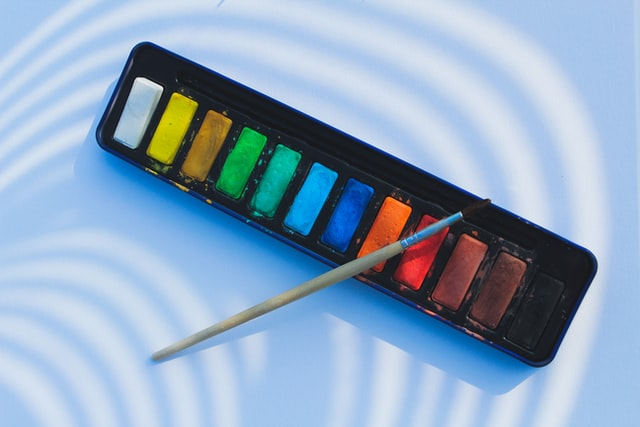<span>Photo by <a href="https://unsplash.com/@siora18?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Siora Photography</a> on <a href="https://unsplash.com/@siora18?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>

<a id="2.7"></a>
## 2.7 Feature Extraction
In machine learning, pattern recognition and in image processing, [`feature extraction`](https://en.wikipedia.org/wiki/Feature_extraction) starts from an initial set of measured data and builds derived values (features) intended to be informative and non-redundant, facilitating the subsequent learning and generalization steps, and in some cases leading to better human interpretations. **Feature extraction is related to dimensionality reduction.**

### Principal Component Analysis (PCA)
- The principal component analysis is an unsupervised machine learning algorithm used for feature selection using dimensionality reduction techniques. As the name suggests, it finds out the principal components from the data. 
- PCA transforms and fits the data from a higher-dimensional space to a new, lower-dimensional subspace this results into an entirely new coordinate system of the points where the first axis corresponds to the first principal component that explains the most variance in the data.

>**Note:** `Principal components` are the derived features which explain the maximum variance in the data. The first principal component explains the most variance, the 2nd a bit less and so on. Each of the new dimensions found using PCA is a linear combination of the old features.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
%matplotlib inline

from sklearn.datasets import load_boston

boston = load_boston()
data = pd.DataFrame(boston.data, columns = boston.feature_names)
data['Price'] = boston.target

## feature matrix 
X = data.drop("Price", 1)  

## target feature
y = data['Price']               
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
from sklearn.preprocessing import StandardScaler

## Before appliying PCA, its recommended to scale the dataset
scaler=StandardScaler()
scaled_data=scaler.fit_transform(X)

df=pd.DataFrame(data=scaled_data, columns= data.columns[:-1])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


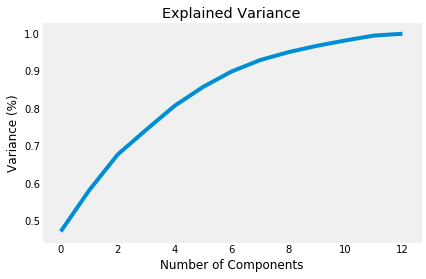

In [16]:
from sklearn.decomposition import PCA

pca = PCA()
principalComponents = pca.fit_transform(df)

## Figure plot (Scree plot)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
#for each component
plt.ylabel('Variance (%)') 
plt.title('Explained Variance')
plt.grid()
plt.show()

In [11]:
'''FRom the Scree plot, it can be seen that 11 components are required to explain 99% 
of the variance which is still better than computing using all the 13 features. 
The explained variance threshold can be choosen based on 
the doamin and business requirements.
'''
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(df)
PC_data=pd.DataFrame(principalComponents,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11'])
PC_data.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,-2.098297,0.773113,0.342943,-0.891774,0.423070,-0.315338,0.318641,0.295832,-0.424937,0.640206,-0.033000
1,-1.457252,0.591985,-0.695199,-0.487459,-0.195876,0.264223,0.553861,-0.223670,-0.166962,0.084236,-0.640810
2,-2.074598,0.599639,0.167122,-0.739204,-0.934534,0.448095,0.484560,0.105166,0.069775,-0.180380,-0.487557
3,-2.611504,-0.006871,-0.100284,-0.343721,-1.104956,0.664649,0.622641,0.255941,-0.342246,0.045901,-0.360209
4,-2.458185,0.097712,-0.075348,-0.427907,-1.065924,0.617047,0.705086,-0.134524,-0.417668,-0.140880,-0.395150


***Advantage of using PCA***
- Correlated features are removed.
- Overfitting is reduced.
- Ability to handle noise